In [1]:
from qiskit import IBMQ, QuantumCircuit
from experiments.utils import pickle_dump, pickle_load

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-keio', group='keio-internal', project='keio-students')

simulator = provider.get_backend("ibmq_qasm_simulator")
backend = provider.get_backend("ibmq_paris")

In [3]:
# prepare benchmark
import glob
from experiments.waiting_duration import DelayBenchmark

path_to_qasm = "/Users/Yasuhiro/Documents/aqua/gp/QASMBench/small/*/*.qasm"
path_list = glob.glob(path_to_qasm)
benchmark_qc_list = []
for path_i in path_list[:1]:
    qc_i = QuantumCircuit.from_qasm_file(path_i)
    qc_name = os.path.splitext(os.path.basename(path_i))[0]
    qc_i.name = qc_name
    benchmark_qc_list.append(qc_i)

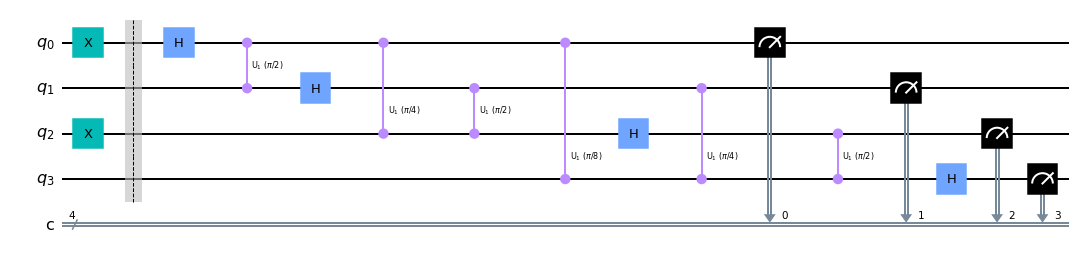

In [7]:
benchmark_qc_list[0].draw(output="mpl")

In [ ]:
delay_bench = DelayBenchmark()
delay_bench.compose()

initial_layout = None

job_id_sim, job_id_delay_op, job_id_delay_meas = delay_bench.run(backend, simulator, initial_layout=initial_layout)

save_path = "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/job_id/20201105_toffoli_ibmq_paris.pickle"
pickle_dump({"job_id_sim": job_id_sim, "job_id_delay_op": job_id_delay_op, "job_id_delay_meas": job_id_delay_meas}, save_path)